<a href="https://colab.research.google.com/github/Sevenc1over/AI-class/blob/main/10%EC%A3%BC%EC%B0%A8/AE_creditcard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam

In [2]:
# 1. 데이터 로드 및 전처리
# 신용카드 데이터셋을 불러옵니다.

df = pd.read_csv('/content/drive/MyDrive/creditcard.csv')

In [3]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [4]:
df.shape

(284807, 31)

In [5]:
# 결측치 홗인

df.isnull().values.any()

np.False_

In [6]:
LABELS = ["Normal", "Fraud"]

/tmp/ipython-input-2107955042.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  count_classes = pd.value_counts(df['Class'], sort = True)


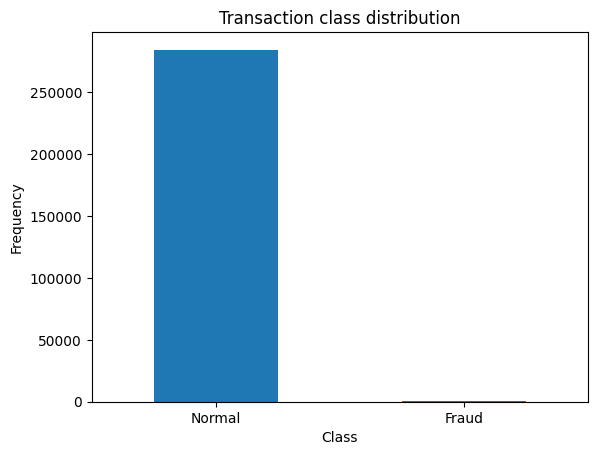

In [7]:
count_classes = pd.value_counts(df['Class'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Transaction class distribution")
plt.xticks(range(2), LABELS)
plt.xlabel("Class")
plt.ylabel("Frequency");

In [8]:
frauds = df[df.Class == 1]
normal = df[df.Class == 0]
frauds.shape

(492, 31)

In [9]:
normal.shape

(284315, 31)

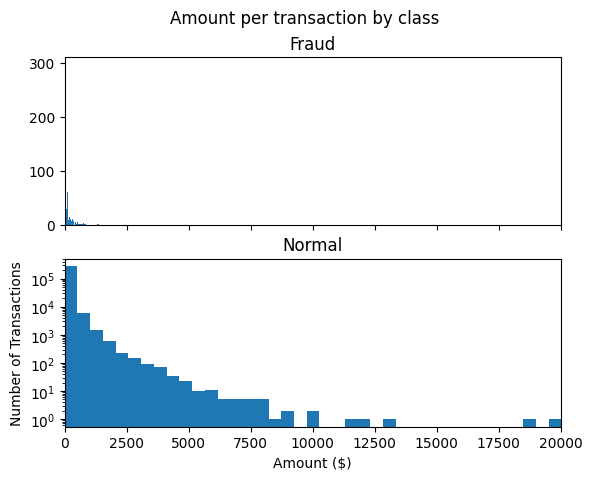

In [10]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Amount per transaction by class')

bins = 50

ax1.hist(frauds.Amount, bins = bins)
ax1.set_title('Fraud')

ax2.hist(normal.Amount, bins = bins)
ax2.set_title('Normal')

plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.xlim((0, 20000))
plt.yscale('log')
plt.show();

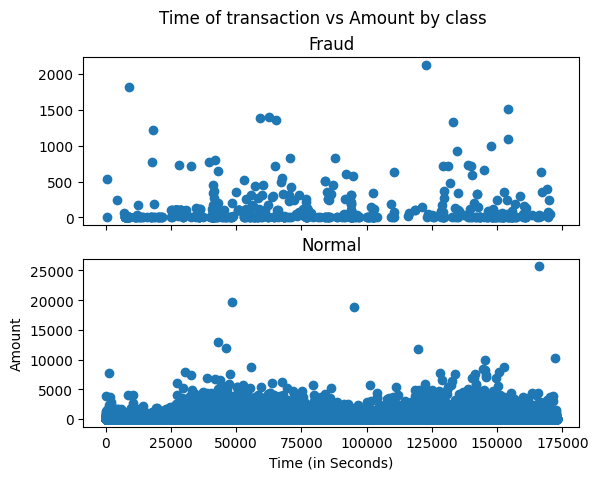

In [11]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Time of transaction vs Amount by class')

ax1.scatter(frauds.Time, frauds.Amount)
ax1.set_title('Fraud')

ax2.scatter(normal.Time, normal.Amount)
ax2.set_title('Normal')

plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()

In [12]:
from sklearn.preprocessing import StandardScaler

data = df.drop(['Time'], axis=1)

data['Amount'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1, 1))

In [13]:
RANDOM_SEED = 42

In [14]:
X_train, X_test = train_test_split(data, test_size=0.2, random_state=RANDOM_SEED)
X_train = X_train[X_train.Class == 0]
X_train = X_train.drop(['Class'], axis=1)

y_test = X_test['Class']
X_test = X_test.drop(['Class'], axis=1)

X_train = X_train.values
X_test = X_test.values

X_train.shape

(227451, 29)

In [78]:
input_dim = X_train.shape[1]
encoding_dim = 64  # 인코딩 차원을 설정 (임의로 설정한 값, 조정 가능)

input_layer = Input(shape=(input_dim,))
encoded = Dense(encoding_dim, activation='relu')(input_layer)
encoded = Dense(int(encoding_dim / 2), activation='relu')(encoded)
encoded = Dense(int(encoding_dim / 4), activation='relu')(encoded)
encoded = Dense(int(encoding_dim / 8), activation='relu')(encoded)
encoded = Dense(int(encoding_dim / 16), activation='relu')(encoded)
encoded = Dense(int(encoding_dim / 32), activation='relu')(encoded)
decoded = Dense(int(encoding_dim / 16), activation='relu')(encoded)
decoded = Dense(int(encoding_dim / 8), activation='relu')(encoded)
decoded = Dense(int(encoding_dim / 4), activation='relu')(decoded)
decoded = Dense(int(encoding_dim / 2), activation='relu')(decoded)
decoded = Dense(input_dim, activation='sigmoid')(decoded)

autoencoder = Model(inputs=input_layer, outputs=decoded)
autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

In [80]:
# 3. 모델 학습
# 훈련데이터의 0.1 을 validation data로 사용
history = autoencoder.fit(X_train, X_train,
                          epochs=100,
                          batch_size=256,
                          shuffle=True,
                          validation_split = 0.1)

Epoch 1/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 0.8786 - val_loss: 0.8745
Epoch 2/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.9005 - val_loss: 0.8745
Epoch 3/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.9143 - val_loss: 0.8751
Epoch 4/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.8999 - val_loss: 0.8778
Epoch 5/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.8939 - val_loss: 0.8735
Epoch 6/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.8753 - val_loss: 0.8737
Epoch 7/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.9045 - val_loss: 0.8736
Epoch 8/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.8738 - val_loss: 0.8732
Epoch 9/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.8670 - val_loss: 0.8723
Epoch 10/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.9007 - val_loss: 0.8730
Epoch 11/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.8838 - val_loss: 0.8725
Epoch 12/100
800/800 ━━━━━━━━━━━━━━━━━━━━

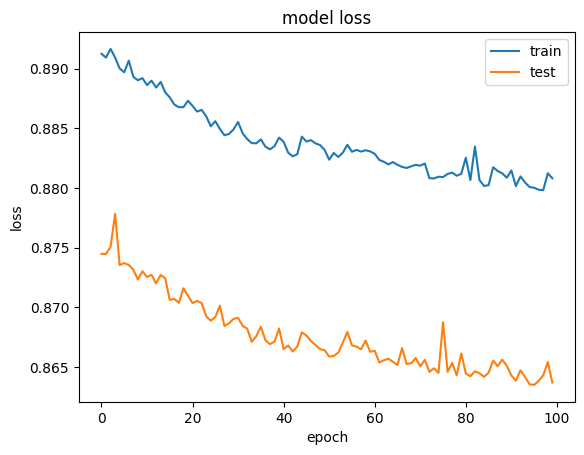

In [81]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right');

In [82]:
# X_test 값을 넣어서 Reconstruction Error 값을 얻고,
# 실제 레이블인 y_test와 데이터프레임으로 구성
# Reconstruction Error + 실제 레이블의 형태가 됨

predictions = autoencoder.predict(X_test)
mse = np.mean(np.power(X_test - predictions, 2), axis=1)
error_df = pd.DataFrame({'reconstruction_error': mse,
                        'true_class': y_test})
error_df.describe()

1781/1781 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


,reconstruction_error,true_class
count,56962.000000,56962.000000
mean,0.905723,0.001720
std,3.760504,0.041443
min,0.055521,0.000000
25%,0.293815,0.000000
50%,0.480176,0.000000
75%,0.760954,0.000000
max,259.177170,1.000000


In [83]:
error_df.head()

,reconstruction_error,true_class
43428,82.002585,1
49906,0.951441,0
29474,0.394165,0
276481,0.474296,0
278846,0.200790,0


In [84]:
# threshold 값을 조정하여 최선의 정확도를 얻음, 그래프로를 보고 결정

threshold = 15

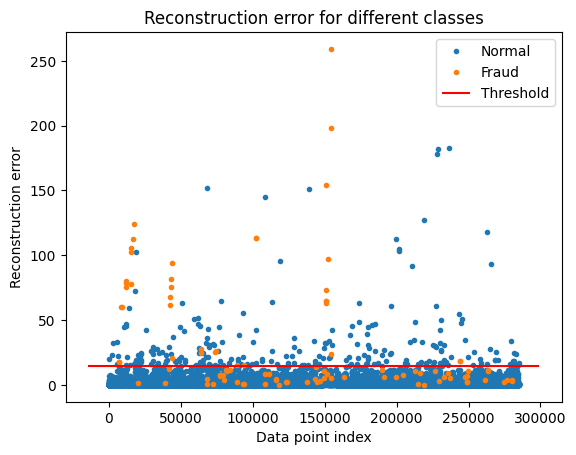

In [85]:
groups = error_df.groupby('true_class')
fig, ax = plt.subplots()

for name, group in groups:
    ax.plot(group.index, group.reconstruction_error, marker='o', ms=3, linestyle='',
            label= "Fraud" if name == 1 else "Normal")
ax.hlines(threshold, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show();

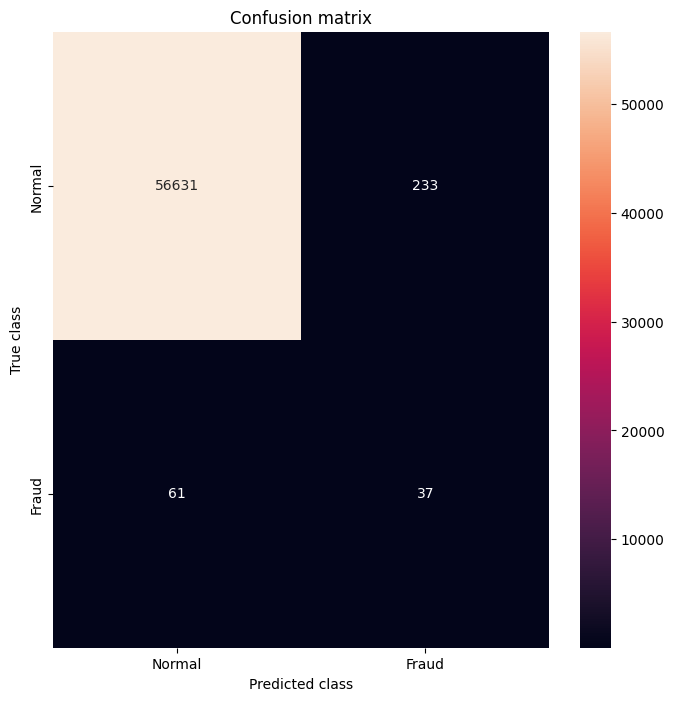

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.14      0.38      0.20        98

    accuracy                           0.99     56962
   macro avg       0.57      0.69      0.60     56962
weighted avg       1.00      0.99      1.00     56962



In [86]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

y_pred = [1 if e > threshold else 0 for e in error_df.reconstruction_error.values]
conf_matrix = confusion_matrix(error_df.true_class, y_pred)
plt.figure(figsize=(8, 8))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

print(classification_report(error_df.true_class, y_pred))